<a href="https://colab.research.google.com/github/lo-lim/SMWU/blob/main/Machine%20Learning%20with%20Python/heart_disease_csv%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import NumPy under the abbreviation 'np'
import numpy as np

In [ ]:
# Import the heart disease dataset and save it to a variable
# using pandas and read_csv()
# Hint: You can directly pass the URL of a csv to read_csv()
heart_disease = pd.read_csv("https://raw.githubusercontent.com/CongLiu-CN/zero-to-mastery-ml/master/data/heart-disease.csv")

# Check the first 5 rows of the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data=heart_disease 

In [ ]:
data.describe()  #기술통계량을 보여줌   
#age, trestbps, chol, thalach, oldpeak 변수들만 계량형 척도, 나머지는 범주형 척도 ----> 계량형 척도들의 변수들만 기술통계량이 의미가 있음을 염두에 두어야 함. 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info() # 데이터에 존재하는 모든 변수들은 숫자형 척도로 되어있음 ----> 실제 특성은 범주형인데 척도가 숫자형으로 나타난 것은 Label Encoding이 된 형태로 잘 분류되었기 때문이라고 볼 수 있음.
# ----> 따라서 원핫인코딩이나 레이블 인코딩과 같은 범주화를 실시하지 않아도 됨. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()  # 모든 변수들은 결측치가 없음을 확인 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#[문제 1] Hearts Disease Dataset을 활용한 분류예측 문제에 대한 모델 선정과 이유?
예제로 제시된 모델을 개선하는 경우 만점의 90% 반영
새로운 모델을 적용할 경우 100% 반영

* **Decision Tree(의사결정나무)**  
 * 각 특성이 개별적으로 처리되기 때문에 데이터의 스케일링에 구애받지 않아, 의사결정나무 모델에서는 변수 특성의 정규화나 표준화 같은 전처리 과정이 필요 없다. 아래에 데이터 시각화를 통해 계량형 척도의 변수에서 Min-Max 스케일링이나 Standardization 스케일링을 진행하지 않아도 되는 것으로 도출되었기 때문에(시각화를 통해서 값들이 고르게 분포되었음을 확인) 스케일링 영향을 받지 않는 **'의사결정나무 모델'** 로 선정함.  

 * 모델의 시각화가 직관적이어서 설명하기에 좋고 변수의 데이터 타입이 이진(binary)이나 연속값, 또는 이들이 혼합되어 있어도 잘 동작하는 장점이 있다. 데이터 변수들을 잘 살펴보면, 일부 변수들의 타입이 이진이나 삼진 또는 그 이상으로 분류되어 있는 형태고(sex, cp, fbs, restecg, exang, slope, ca, thal) 나머지 변수들의 타입이 연속값이기에 (trestbps, chol, thalach, oldpeak) 의사결정나무 모델을 사용하는 것은 적절하다.   
 * 다만 사전 가지치기 (예. 나무의 깊이 줄이기)를 사용해도 과적합되는 경향이 있어 일반화 성능이 좋지 않다. 따라서 이를 해결하기 위해서 단일 의사결정나무 대신 앙상블 방법(ex, 랜덤포레스트, 그래디언트 부스팅 모델)을 사용하기도 한다. 

* **랜덤 포레스트 (Random forest)** 
 * 의사결정나무 모델의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것이다. 랜덤 포레스트는 이 문제를 회피할 수 있는 방법이다. 아무런 매개변수 튜닝 없이도 선형 모델이나 단일 결정 트리보다 높은 정확도를 낸다. 랜덤 포레스트는 하이퍼 파라미터 조정 없이 기본 설정으로도 좋은 결과를 만들어줄 때가 많다. 위 의사결정나무 모델과 동일하게
계량형 척도 변수의 스케일링을 맞추지 않아도 되고 기본적으로 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있기 때문에 랜덤포레스트 모델을 선정했다.   

* **그래디언트 부스팅 (Gradient Boosting)** 
 * 다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이 연속적인 특성에서도 잘 동작하는데, 그래디언트 부스팅은 지도 학습에서 가장 강력하고 널리 사용되는 모델 중 하나이기에 선정했다. 

**---> 결정적으로 랜덤포레스트와 그래디언트 부스팅 같은 앙상블 기법 모델은 전처리가 거의 또는 전혀 필요 없는 모델이다. 원본데이터에서 변수들을 다 사용하고 스케일링과 같은 전처리를 진행하지 않기 때문에 적절한 모델들이다. 또한 의사결정나무 모델을 보완한 모델이기에 선정했다.**   

* **SVM 모델** 
 * SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있다. 현재 heart_disease의 columns의 14개 뿐이고 특성도 int, float 2가지 뿐이기 때문에 SVM 모델에도 적용해 보았다. 또한 SVM 모델은 모든 특성이 비슷한 단위이고 스케일이 비슷한 데이터에 사용하기 적절하기 때문에 선정하게 되었다.

[출처] https://harryp.tistory.com/871


#[문제 2] 데이터시각화를 통해 데이터를 분석하시오.

1    165
0    138
Name: target, dtype: int64


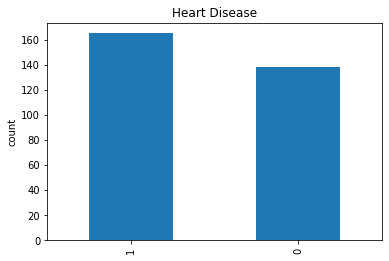

In [ ]:
print(data['target'].value_counts())

data['target'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Heart Disease')
plt.show()

#종속변수의 빈도수를 시각화함---> 골고루 잘 분포되었음을 알 수 있음 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f429b529760>,
      dtype=object)

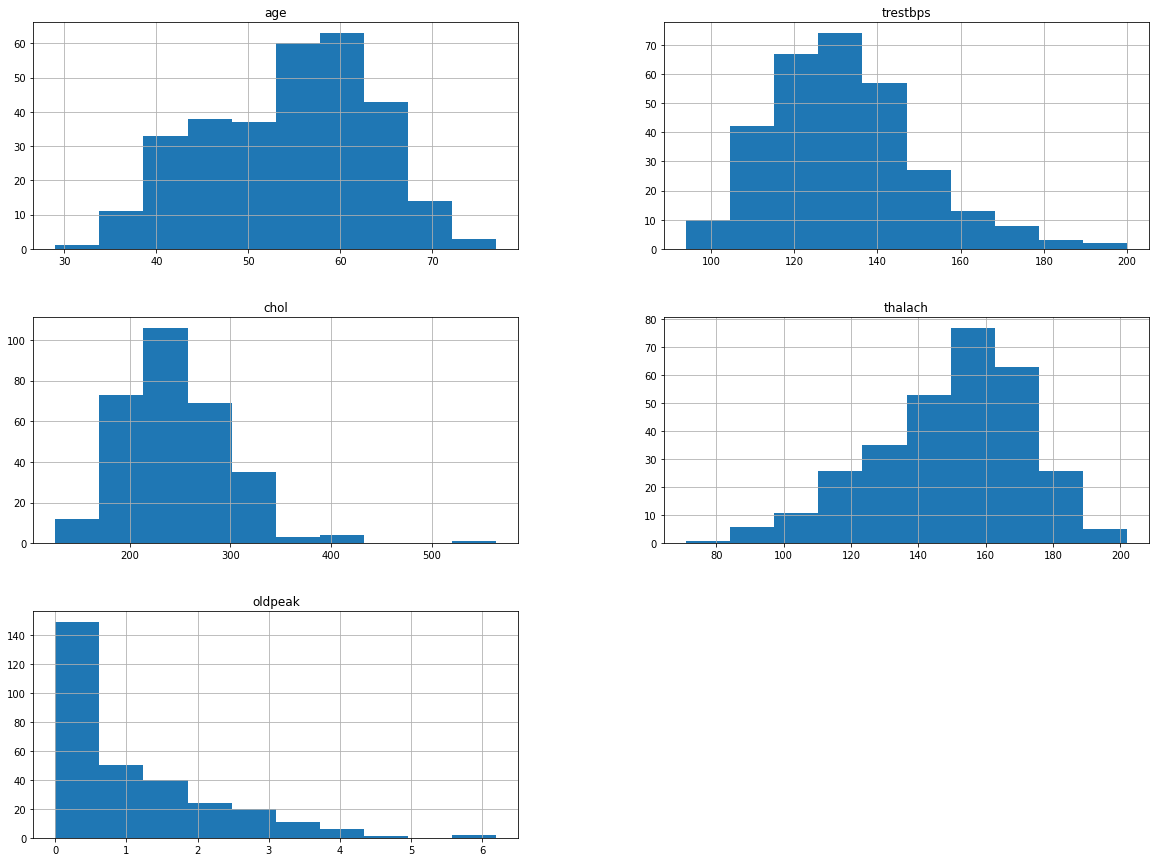

In [ ]:
pd.DataFrame(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]).hist(figsize=(20,15)) #계량형 변수들의 분포도를 시각화로 표현 

# ----> 계량형 척도들의 변수들의 분포가 고르게 잘 분포되어 있기 때문에 스케일링 전처리를 진행하지 않음 

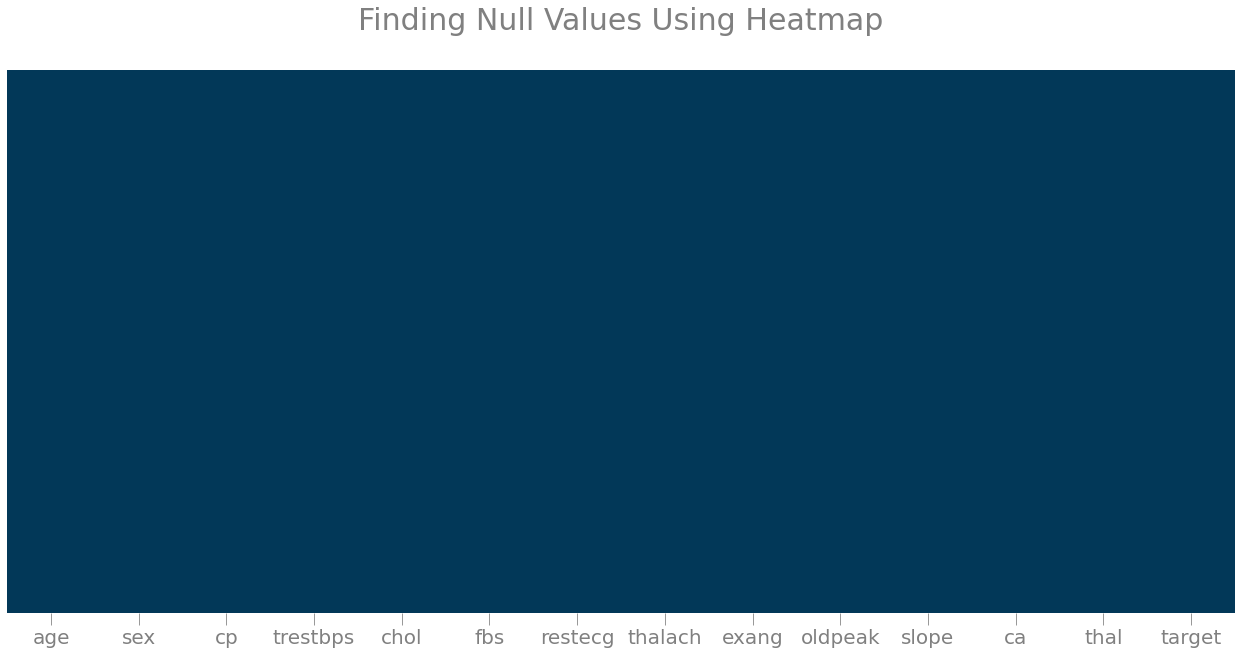

In [ ]:
plt.figure(figsize=(22,10))
plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')
plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)
sns.heatmap(data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

# ----> 모든 변수들에 결측치 값이 없음을 시각화로 표현함.

#[문제 3] Features 와 Label을 분리하시오.

In [ ]:
display(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
X=data.loc[:, 'age':'thal'] #독립변수

In [ ]:
y=data.loc[:, 'target':] #종속변수 

In [ ]:
display(X) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
display(y)

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


#[문제 4] Training Set과 Test sets을 분리하시오,

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)   #test와 train 비율을 2:8로 설정함 

#[문제 5] 모델의 성능을 평가하시오.

## **Decision Tree(의사결정나무)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

#의사결정나무 모델의 디폴트 값으로 진행하면 학습용 데이터가 100으로 과적합 상태가 발생됨 --> 추가 옵션(파라미터) 실행 

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.721


### Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'max_depth': range(2,20,2), 'min_samples_leaf': range(1,50,2)}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 50, 2)},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))  #최적의 파라미터는 {'max_depth': 14, 'min_samples_leaf': 11}

Best Parameter: {'max_depth': 14, 'min_samples_leaf': 11}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.822


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.754


In [ ]:
result_grid=pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006475,0.003081,0.002556,0.000134,2,1,"{'max_depth': 2, 'min_samples_leaf': 1}",0.591837,0.734694,0.770833,...,0.736139,0.076241,209,0.797927,0.803109,0.804124,0.768041,0.783505,0.791341,0.013781
1,0.008475,0.003420,0.003495,0.001640,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.591837,0.734694,0.770833,...,0.736139,0.076241,209,0.797927,0.803109,0.804124,0.768041,0.783505,0.791341,0.013781
2,0.006712,0.002042,0.003389,0.001661,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.591837,0.734694,0.770833,...,0.736139,0.076241,209,0.797927,0.803109,0.804124,0.768041,0.783505,0.791341,0.013781
3,0.006323,0.001736,0.004057,0.001801,2,7,"{'max_depth': 2, 'min_samples_leaf': 7}",0.591837,0.734694,0.770833,...,0.736139,0.076241,209,0.797927,0.803109,0.804124,0.768041,0.783505,0.791341,0.013781
4,0.004578,0.000085,0.002307,0.000018,2,9,"{'max_depth': 2, 'min_samples_leaf': 9}",0.591837,0.734694,0.791667,...,0.740306,0.078558,130,0.797927,0.803109,0.788660,0.768041,0.783505,0.788248,0.012211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.003082,0.000176,0.001582,0.000141,18,41,"{'max_depth': 18, 'min_samples_leaf': 41}",0.673469,0.734694,0.729167,...,0.756633,0.058576,49,0.782383,0.782383,0.783505,0.757732,0.762887,0.773778,0.011125
221,0.003548,0.000246,0.001897,0.000162,18,43,"{'max_depth': 18, 'min_samples_leaf': 43}",0.673469,0.734694,0.729167,...,0.756633,0.058576,49,0.782383,0.782383,0.783505,0.757732,0.762887,0.773778,0.011125
222,0.003389,0.000237,0.001757,0.000029,18,45,"{'max_depth': 18, 'min_samples_leaf': 45}",0.673469,0.734694,0.729167,...,0.756633,0.058576,49,0.782383,0.782383,0.783505,0.757732,0.762887,0.773778,0.011125
223,0.003150,0.000450,0.001649,0.000344,18,47,"{'max_depth': 18, 'min_samples_leaf': 47}",0.673469,0.734694,0.729167,...,0.756633,0.058576,49,0.782383,0.782383,0.783505,0.757732,0.762887,0.773778,0.011125


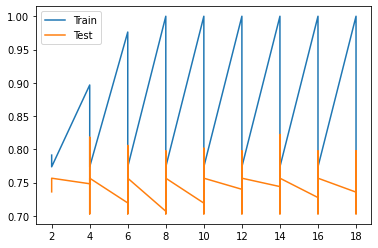

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

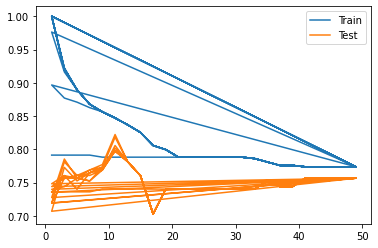

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'max_depth': randint(low=1, high=20), 
                  'min_samples_leaf': randint(low=1, high=50)}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
random_search=RandomizedSearchCV(DecisionTreeClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f429a18a370>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f429b2c5220>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_)) # 최적의 파라미터는  {'max_depth': 1, 'min_samples_leaf': 14}  ---> 다만 랜덤이라 실행할 때마다 값이 다르게 나옴 

Best Parameter: {'max_depth': 1, 'min_samples_leaf': 14}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.757


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.705


In [ ]:
result_random = random_search.cv_results_

In [ ]:
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004169,0.001198,0.001967,0.000510,1,14,"{'max_depth': 1, 'min_samples_leaf': 14}",0.673469,0.734694,0.729167,...,0.756633,0.058576,1,0.782383,0.782383,0.783505,0.757732,0.762887,0.773778,0.011125
1,0.003150,0.000358,0.001512,0.000065,12,45,"{'max_depth': 12, 'min_samples_leaf': 45}",0.673469,0.734694,0.729167,...,0.756633,0.058576,1,0.782383,0.782383,0.783505,0.757732,0.762887,0.773778,0.011125
2,0.003066,0.000101,0.001522,0.000066,5,19,"{'max_depth': 5, 'min_samples_leaf': 19}",0.591837,0.734694,0.791667,...,0.740306,0.078558,7,0.797927,0.803109,0.788660,0.824742,0.783505,0.799589,0.014325
3,0.003510,0.000743,0.001775,0.000452,6,24,"{'max_depth': 6, 'min_samples_leaf': 24}",0.591837,0.734694,0.791667,...,0.740306,0.078558,7,0.797927,0.803109,0.788660,0.768041,0.783505,0.788248,0.012211
4,0.003333,0.000760,0.001653,0.000375,1,31,"{'max_depth': 1, 'min_samples_leaf': 31}",0.673469,0.734694,0.729167,...,0.756633,0.058576,1,0.782383,0.782383,0.783505,0.757732,0.762887,0.773778,0.011125
5,0.003254,0.000484,0.001525,0.000079,9,25,"{'max_depth': 9, 'min_samples_leaf': 25}",0.591837,0.734694,0.791667,...,0.740306,0.078558,7,0.797927,0.803109,0.788660,0.768041,0.783505,0.788248,0.012211
6,0.002965,0.000091,0.001481,0.000057,15,38,"{'max_depth': 15, 'min_samples_leaf': 38}",0.673469,0.734694,0.729167,...,0.744133,0.046246,6,0.782383,0.782383,0.783505,0.768041,0.762887,0.775840,0.008637
7,0.003485,0.000296,0.001734,0.000188,12,25,"{'max_depth': 12, 'min_samples_leaf': 25}",0.591837,0.734694,0.791667,...,0.740306,0.078558,7,0.797927,0.803109,0.788660,0.768041,0.783505,0.788248,0.012211
8,0.003025,0.000249,0.001521,0.000062,1,43,"{'max_depth': 1, 'min_samples_leaf': 43}",0.673469,0.734694,0.729167,...,0.756633,0.058576,1,0.782383,0.782383,0.783505,0.757732,0.762887,0.773778,0.011125
9,0.003468,0.000246,0.001793,0.000192,16,46,"{'max_depth': 16, 'min_samples_leaf': 46}",0.673469,0.734694,0.729167,...,0.756633,0.058576,1,0.782383,0.782383,0.783505,0.757732,0.762887,0.773778,0.011125


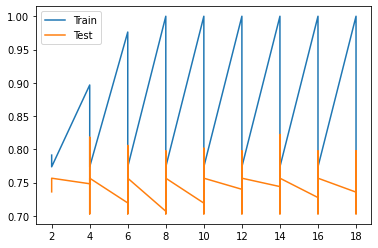

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

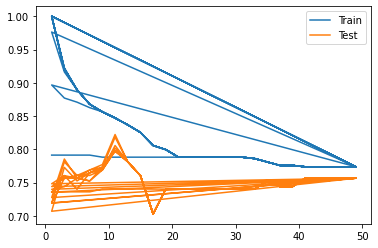

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### 의사결정나무 그리기 및 중요도 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier(max_depth=14, min_samples_leaf=11)  #grid search로 구한 최적의 파라미터를 이용하여 의사결정나무 시각화를 실시 

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=11)

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# graphvis 설치가 제대로 되지 않을 경우 아래에서 직접 설치
# https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi

In [ ]:
import graphviz

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Yes", "No"],
                feature_names=X.columns, impurity=False, filled=True)

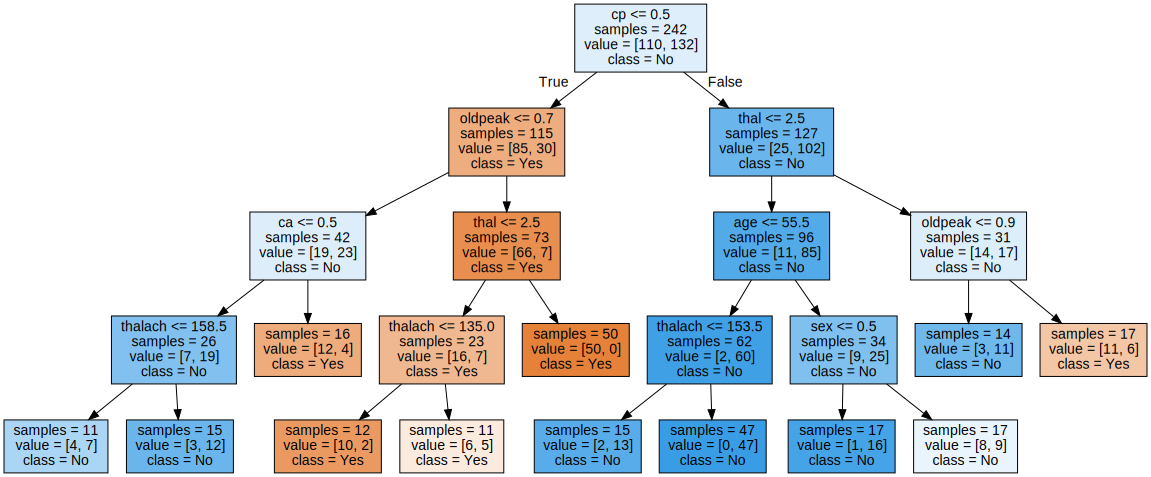

In [ ]:
with open("tree.dot", encoding ="euc-kr") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [ ]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.03437866 0.04175955 0.51424732 0.         0.         0.
 0.         0.02456315 0.         0.19930592 0.         0.06633702
 0.11940839]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

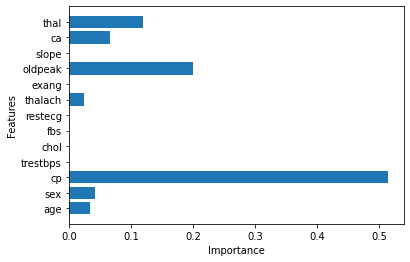

In [ ]:
def plot_feature_importances_wisc(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_wisc(tree)

# cp 변수의 중요도가 제일 높음 

### 모델평가

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier(max_depth=14, min_samples_leaf=11)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=11)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train=tree.predict(X_train)

In [ ]:
confusion_train=confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 89  21]
 [ 17 115]]


In [ ]:
pred_test=tree.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[19  9]
 [ 6 27]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1=f1_score(y_test, pred_test)

In [ ]:
print("f1 score:\n", f1)

f1 score:
 0.7826086956521738


In [ ]:
tree= DecisionTreeClassifier(max_depth=14, min_samples_leaf=11, random_state=0)  #최적의 파라미터를 적용하여 의사결정나무 모델을 생성하고 t,y의 train과 test를 이용하여 정확도 확인 
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

#학습용 0.843, 시험용 0.754로 정확도의 값이 도출 

학습용 데이터 정확도: 0.843
시험용 데이터 정확도: 0.754


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



## **랜덤 포레스트 (Random forest)**

### Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_estimators': range(100, 1000, 100), 
            'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
grid_search=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(100, 1000, 100)},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_)) 
# 최적의 파라미터 값은 {'max_features': 'sqrt', 'n_estimators': 300}

Best Parameter: {'max_features': 'sqrt', 'n_estimators': 300}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.839


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.836


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.156715,0.005636,0.014063,0.002040,auto,100,"{'max_features': 'auto', 'n_estimators': 100}",0.734694,0.816327,0.812500,...,0.822704,0.065074,20,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.298054,0.005742,0.023215,0.001450,auto,200,"{'max_features': 'auto', 'n_estimators': 200}",0.795918,0.836735,0.812500,...,0.834864,0.042924,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.439993,0.008208,0.032328,0.002806,auto,300,"{'max_features': 'auto', 'n_estimators': 300}",0.775510,0.836735,0.812500,...,0.830782,0.039148,10,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.579135,0.007310,0.087584,0.086245,auto,400,"{'max_features': 'auto', 'n_estimators': 400}",0.775510,0.836735,0.833333,...,0.834949,0.046304,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.714725,0.011168,0.054495,0.002153,auto,500,"{'max_features': 'auto', 'n_estimators': 500}",0.775510,0.816327,0.812500,...,0.826701,0.047382,18,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,0.864872,0.017448,0.072032,0.015833,auto,600,"{'max_features': 'auto', 'n_estimators': 600}",0.734694,0.795918,0.791667,...,0.810289,0.059311,27,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,1.008680,0.008576,0.073115,0.002732,auto,700,"{'max_features': 'auto', 'n_estimators': 700}",0.714286,0.816327,0.812500,...,0.818622,0.064433,24,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,1.137087,0.020342,0.094080,0.012283,auto,800,"{'max_features': 'auto', 'n_estimators': 800}",0.734694,0.816327,0.833333,...,0.826871,0.057887,14,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,1.293202,0.019507,0.097582,0.008002,auto,900,"{'max_features': 'auto', 'n_estimators': 900}",0.755102,0.816327,0.833333,...,0.835119,0.058727,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,0.144978,0.005852,0.012264,0.000677,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",0.755102,0.795918,0.833333,...,0.814371,0.047675,25,1.0,1.0,1.0,1.0,1.0,1.0,0.0


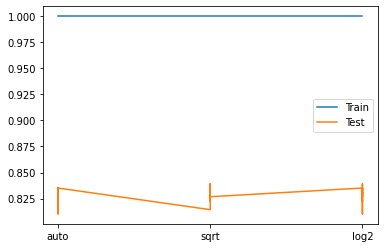

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

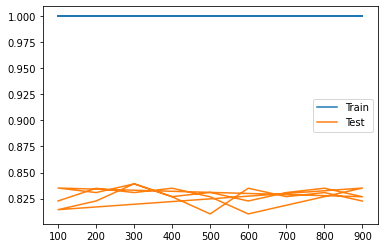

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'n_estimators': randint(low=100, high=1000), 
                  'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_search=RandomizedSearchCV(RandomForestClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f429a17e250>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'max_features': 'auto', 'n_estimators': 143}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.839


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.803


In [ ]:
result_random = random_search.cv_results_

In [ ]:
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.198870,0.004202,0.022754,0.003291,auto,132,"{'max_features': 'auto', 'n_estimators': 132}",0.714286,0.836735,0.833333,...,0.822704,0.059203,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.632517,0.011841,0.050067,0.003192,auto,441,"{'max_features': 'auto', 'n_estimators': 441}",0.775510,0.836735,0.812500,...,0.839116,0.053801,3,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.429386,0.012324,0.031731,0.000491,log2,296,"{'max_features': 'log2', 'n_estimators': 296}",0.734694,0.836735,0.833333,...,0.835119,0.064150,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.142226,0.084661,0.084830,0.007026,log2,749,"{'max_features': 'log2', 'n_estimators': 749}",0.734694,0.816327,0.833333,...,0.826871,0.064954,5,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.339144,0.031859,0.033096,0.002617,auto,143,"{'max_features': 'auto', 'n_estimators': 143}",0.755102,0.816327,0.854167,...,0.839286,0.052999,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,0.409043,0.012950,0.031348,0.000503,log2,278,"{'max_features': 'log2', 'n_estimators': 278}",0.734694,0.816327,0.833333,...,0.822704,0.058022,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,1.621597,0.416603,0.122598,0.037683,sqrt,957,"{'max_features': 'sqrt', 'n_estimators': 957}",0.755102,0.816327,0.833333,...,0.822619,0.053881,10,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,0.877606,0.118724,0.063059,0.008131,auto,568,"{'max_features': 'auto', 'n_estimators': 568}",0.775510,0.816327,0.812500,...,0.826701,0.047382,7,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,0.487400,0.071882,0.038975,0.010546,auto,177,"{'max_features': 'auto', 'n_estimators': 177}",0.775510,0.816327,0.833333,...,0.839201,0.053500,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,0.960058,0.038537,0.075756,0.011968,sqrt,642,"{'max_features': 'sqrt', 'n_estimators': 642}",0.755102,0.816327,0.812500,...,0.826786,0.052103,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0


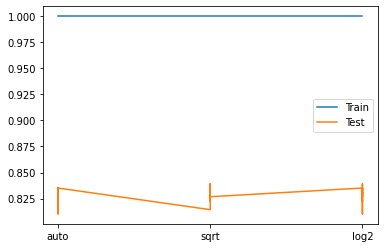

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_features'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

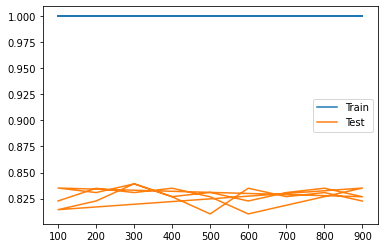

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_estimators'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Forest=RandomForestClassifier(max_features='auto', n_estimators=492)

In [ ]:
Forest.fit(X_train, y_train)

In [ ]:
print("특성 중요도:\n{}".format(Forest.feature_importances_))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_feature_importances_forest(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_forest(Forest)

### 모델평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Forest=RandomForestClassifier(max_features='sqrt', n_estimators=300)  # 최적의 파라미터 적용 {'max_features': 'sqrt', 'n_estimators': 300}

In [ ]:
Forest.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(Forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(Forest.score(X_test, y_test)))

#학습용 1.000, 시험용 0.803로 정확도의 값이 도출 

<ipython-input-145-75e348b4ab89>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Forest.fit(X_train, y_train)


학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.803


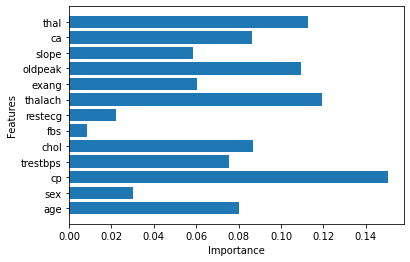

In [ ]:
plot_feature_importances_wisc(Forest)

#의사결정나무 모델보다 중요도가 높은 변수들의 종류가 더 많다 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train=Forest.predict(X_train)

In [ ]:
confusion_train=confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[110   0]
 [  0 132]]


In [ ]:
pred_test=Forest.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[18 10]
 [ 2 31]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1=f1_score(y_test, pred_test)

In [ ]:
print("f1 score:\n", f1)

f1 score:
 0.8378378378378378


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



## **그래디언트 부스팅 (Gradient Boosting)**

### Grid Search

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid= {'max_depth': range(1,20), 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}   #파라미터의 범위를 설정 

In [ ]:
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=param_grid, cv=3, refit=True)   #가장 최적의 패러미터가 나오면 이 값을 이 모델이 적용시기키 위해 refit=True 설정 

# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': range(1, 20)})

### 모델평가

In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

# 최적의 파라미터 값은 {'learning_rate': 0.04, 'max_depth': 1}

GridSearchCV 최적 파라미터: {'learning_rate': 0.04, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.8390


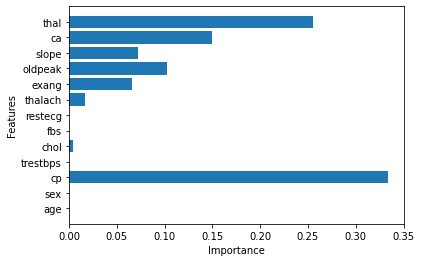

In [ ]:
plot_feature_importances_wisc(gbrt)  #위에서 생성한 중요도를 구하는 함수에 gbrt 모델 적용 

# -----> 의사결정나무 모델과 동일하게 cp 변수의 중요도가 제일 높음

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.04, max_depth=1)  #최적의 파라미터 값을 적용 
gbrt.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.04, max_depth=1, random_state=0)

In [ ]:
print("학습용 데이터 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 정확도: 0.851
시험용 데이터 정확도: 0.836


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train=gbrt.predict(X_train)

In [ ]:
confusion_train=confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 87  23]
 [ 13 119]]


In [ ]:
pred_test=gbrt.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[19  9]
 [ 1 32]]


In [ ]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

#최적 파라미터: {'learning_rate': 0.04, 'max_depth': 1}

GridSearchCV 최적 파라미터: {'learning_rate': 0.04, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.8390


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1=f1_score(y_test, pred_test)

In [ ]:
print("f1 score:\n", f1)

f1 score:
 0.8648648648648648


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



## **svm 모델**

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# rbf, linear, poly, sigmoid 적용

# param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
#              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, 
#             {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
#              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
#             {'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
#              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
#              {'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
#              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}] 

In [ ]:
from sklearn.svm import SVC

In [ ]:
# grid_search=GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [ ]:
# grid_search.fit(X_train, y_train)  #----->  4가지 함수를 다 적용하려고 했는데 런타임이 너무 오래 걸려서 (6분 넘음..) rbf와 linear 함수만 비교해서 실행 

In [ ]:
param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}] 

In [ ]:
grid_search=GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}],
             return_train_score=True)

In [ ]:
param_grid2=[{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}] 

In [ ]:
grid_search2=GridSearchCV(SVC(), param_grid2, cv=5, return_train_score=True)

In [ ]:
grid_search2.fit(X_train, y_train)     # 런타임이 너무 오래 걸려서 끊음(실행 중단)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

KeyboardInterrupt: ignored

실행하는데에 런타임이 너무 오래걸려서 교수님께서 감안해서 채점한다고 하심. 4가지 함수를 다 사용해서 비교하는 방법이 훨씬 정확할 거라 생각하고 다 사용하려 했지만 런타임 시간이 10분 이상 넘어가서 끊고 rbf 함수만 사용함. 

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))

# Kernel 함수의 rbf의 최적의 파라미터를 보여줌 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Best Parameter: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.653


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.672


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008848,0.000233,0.005457,0.001332,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.551020,0.551020,...,0.545408,0.004582,10,0.544041,0.544041,0.546392,0.546392,0.546392,0.545452,0.001151
1,0.009763,0.002585,0.004379,0.000164,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.551020,0.551020,...,0.545408,0.004582,10,0.544041,0.544041,0.546392,0.546392,0.546392,0.545452,0.001151
2,0.012802,0.005644,0.005915,0.002677,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.551020,0.551020,...,0.545408,0.004582,10,0.544041,0.544041,0.546392,0.546392,0.546392,0.545452,0.001151
3,0.006964,0.001645,0.003718,0.001047,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.551020,0.551020,...,0.545408,0.004582,10,0.544041,0.544041,0.546392,0.546392,0.546392,0.545452,0.001151
4,0.004698,0.000074,0.002336,0.000081,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.551020,0.551020,...,0.545408,0.004582,10,0.544041,0.544041,0.546392,0.546392,0.546392,0.545452,0.001151
5,0.004553,0.000074,0.002278,0.000100,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.551020,0.551020,...,0.545408,0.004582,10,0.544041,0.544041,0.546392,0.546392,0.546392,0.545452,0.001151
6,0.006352,0.002147,0.002740,0.000453,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.551020,0.551020,...,0.545408,0.004582,10,0.544041,0.544041,0.546392,0.546392,0.546392,0.545452,0.001151
7,0.005700,0.000536,0.002893,0.000611,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.551020,0.551020,...,0.545408,0.004582,10,0.544041,0.544041,0.546392,0.546392,0.546392,0.545452,0.001151
8,0.005597,0.000124,0.002622,0.000166,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.551020,0.551020,...,0.545408,0.004582,10,0.544041,0.544041,0.546392,0.546392,0.546392,0.545452,0.001151
9,0.005092,0.000263,0.002723,0.000521,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.551020,0.551020,...,0.545408,0.004582,10,0.544041,0.544041,0.546392,0.546392,0.546392,0.545452,0.001151


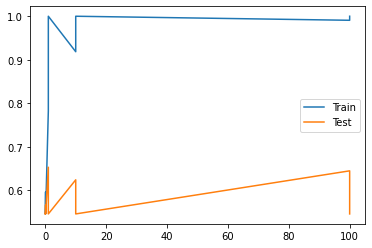

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

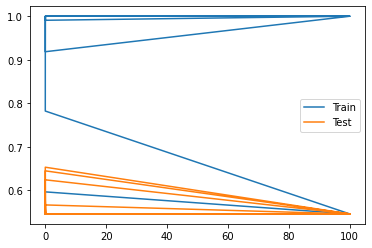

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_gamma'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_gamma'], result_grid['mean_test_score'], label="Test")
plt.legend()

###  모델평가

In [ ]:
from sklearn.svm import SVC

In [ ]:
# 위에서 구한 Best Parameter: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

svc1=SVC(C=10, gamma=0.001, kernel='rbf')

In [ ]:
svc1.fit(X_train, y_train) #생성한 모델에 x,y의 train 적용 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, gamma=0.001)

In [ ]:
svc= SVC(C=10, gamma=0.1, kernel='rbf')
svc.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(svc.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(svc.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.557


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred_train=svc1.predict(X_train)

In [ ]:
confusion_train=confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 99  11]
 [  9 123]]


In [ ]:
pred_test=svc1.predict(X_test)

In [ ]:
confusion_test=confusion_matrix(y_test, pred_test)

In [ ]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[17 11]
 [10 23]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1=f1_score(y_test, pred_test)

In [ ]:
print("f1 score:\n", f1)

f1 score:
 0.6865671641791046


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62        28
           1       0.68      0.70      0.69        33

    accuracy                           0.66        61
   macro avg       0.65      0.65      0.65        61
weighted avg       0.65      0.66      0.66        61



#[문제 6] Hearts Disease Data sets에 본인이 선정한 모델을 적용하여 평가한 결과에 대한 문제점과 개선안을 작성하시오.

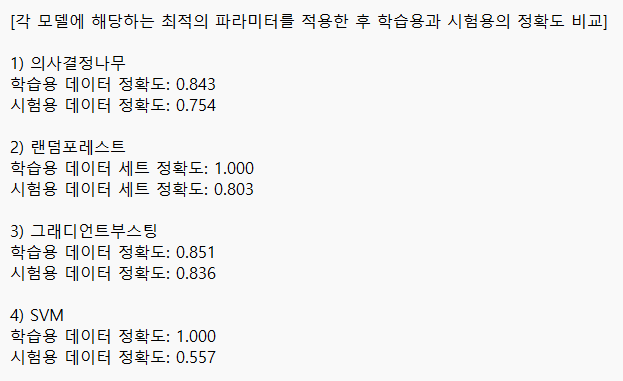

* 랜덤포레스트와 SVM 모델의 학습용 데이터의 정확도가 1.000으로 과적합 문제가 발생하기 때문에 일반화 성능이 좋지 않은 점이 개선해야 한다고 생각한다. 시간적 여유가 있었다면 각 모델에 더 다양한 파라미터 옵션을 추가하여 머신러닝 과정을 진행한다면 과적합 문제를 해결할 수 있을 것이라고 본다.  

* SVM 모델이 상대적으로 다른 모델들 보다 시험용 데이터의 정확도가 상당히 낮은 부분이 문제점이라고 생각한다. 원래 4가지 함수(rbf, linear, poly, sigmod)를 다 사용하여 그리드 서치 과정을 통해 최적의 파라미터를 찾고 정확도를 비교하려고 했는데, 런타임 시간이 너무나 많이 소요가 되어서(10분 이상) rbf 함수로만 머신러닝을 진행한 부분이 너무 아쉬웠다. 추후 시간이 된다면 나머지 함수도 적용하여 머신러닝 과정을 진행하려 한다.  

* heart disease 데이터에 계량형척도(연속형 변수)도 스케일링이 필요가 없을 정도로 고르게 분포가 되었고, 범주형 변수들도 이미 레이블 인코딩 상태였기에 데이터 전처리 과정을 따로 진행하지 않았다. 시간적 여유가 있었다면 데이터를 더 잘 관찰하고 데이터 전처리 과정을 진행하여 더 정확한 머신러닝 과정을 진행해 보고 싶다. ex) 이상치 제거 등등 

**한 학기 동안 다양한 머신러닝 기법들을 배우면서 데이터분석이라는 분야에 더욱더 관심을 갖게 되었습니다. 파이썬 기초 문법만 알고 있었는데 한 학기 동안 파이썬으로 배우는 머신러닝 수업을 통해서 머신러닝이 무엇인지, 어떻게 진행하는 것인지를 자세히 배울 수 있어서 좋았고 이제는 파이썬으로 머신러닝하는 과정은 완벽하게 숙지했을 정도로 저에게는 값진 강의었습니다. 졸업 후에 ba 대학원에서 뵙겠습니다:D 그동안 너무 감사했습니다!**